# Stage A Results Notebook — vMF Time-Series Features

This notebook is **for reporting + visualization only**.

**Workflow**
1. Run the Stage A pipeline from the repo root:
   ```bash
   python run_vmf_pipeline.py
   ```
2. Confirm the output file exists:
   - `outputs/vmf_subject_features.csv`
3. Then use this notebook to:
   - inspect the extracted features
   - generate figures
   - summarize relationships with `attention`, `p_factor`, etc.

> Important: This notebook **does not** re-run the feature extraction pipeline.
> If you change feature logic, edit the Python files and re-run `run_vmf_pipeline.py`.


## 0. Setup

In [2]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Repo root assumptions:
# - You open this notebook from notebooks/ directory
# - The pipeline output lives at ../outputs/vmf_subject_features.csv

OUTPUT_CSV = Path("..") / "outputs" / "vmf_subject_features.csv"
OUTPUT_CSV


WindowsPath('../outputs/vmf_subject_features.csv')

In [4]:
if not OUTPUT_CSV.exists():
    raise FileNotFoundError(
        f"Missing output file: {OUTPUT_CSV}\n\n"
        "Run Stage A first from the repo root:\n"
        "  python run_vmf_pipeline.py\n"
    )
print(f"[OK] Found: {OUTPUT_CSV}")


[OK] Found: ..\outputs\vmf_subject_features.csv


## 1. Load Stage A outputs

In [5]:
df = pd.read_csv(OUTPUT_CSV)
print("Shape:", df.shape)
df.head()


Shape: (68, 22)


,subject,T_used,entropy_mean,entropy_std,switch_rate,vol_l1,vol_l2,maxp_mean,maxp_std,trans_entropy_mean,...,occ_1,occ_2,occ_3,occ_4,occ_5,occ_6,p_factor,attention,internalizing,externalizing
0,NDARAA306NT2,8178.0,0.145710,0.245375,0.610301,1.213794,0.827906,0.940722,0.119489,1.506468,...,0.047635,0.161138,0.280391,0.054503,0.147117,0.020755,0.987,-0.647,1.240,-1.051
1,NDARAA504CRN,8178.0,0.206556,0.272685,0.448572,0.888065,0.590824,0.919172,0.129147,-1407.277645,...,0.155342,0.099981,0.208220,0.030381,0.075774,0.091276,-0.392,-0.342,0.643,0.442
2,NDARAA947ZG5,13501.0,0.132448,0.229086,0.691259,1.376049,0.942926,0.945450,0.115004,1.751023,...,0.148514,0.232106,0.113217,0.082826,0.080632,0.051107,1.561,0.978,0.315,-0.516
3,NDARAA948VFH,9240.6,0.085092,0.189186,0.662306,1.321083,0.915475,0.964764,0.094580,1.732175,...,0.128669,0.121272,0.151316,0.075094,0.126955,0.089313,-0.018,-0.235,0.034,-0.387
4,NDARAB055BPR,9240.8,0.081912,0.135752,0.325228,0.658413,0.454912,0.969761,0.069260,-170.685885,...,0.057854,0.519811,0.073433,0.247308,0.079999,0.000728,0.366,1.029,-0.461,0.144


In [6]:
df.describe(include="all").T.head(30)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
subject,68,68,NDARAA306NT2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T_used,68.0,NaN,NaN,NaN,9598.600735,1269.965624,8175.75,9240.6,9240.6,9242.6,13501.0
entropy_mean,68.0,NaN,NaN,NaN,0.140514,0.054495,0.07679,0.109268,0.125226,0.148627,0.363362
entropy_std,68.0,NaN,NaN,NaN,0.228632,0.035085,0.135752,0.210014,0.224137,0.238944,0.358162
switch_rate,68.0,NaN,NaN,NaN,0.585031,0.10718,0.325228,0.540457,0.610817,0.662943,0.769407
vol_l1,68.0,NaN,NaN,NaN,1.163543,0.214089,0.653371,1.076486,1.213707,1.318428,1.532708
vol_l2,68.0,NaN,NaN,NaN,0.795562,0.150653,0.42978,0.730785,0.830892,0.906707,1.057199
maxp_mean,68.0,NaN,NaN,NaN,0.942849,0.021973,0.850862,0.939488,0.94867,0.954967,0.969761
maxp_std,68.0,NaN,NaN,NaN,0.113024,0.015713,0.06926,0.105144,0.111359,0.119551,0.173634
trans_entropy_mean,68.0,NaN,NaN,NaN,-179.577618,482.014434,-2749.813691,1.279892,1.659751,1.735476,1.839555


## 2. Quick sanity checks

In [7]:
# Required columns (minimum expected)
required_cols = ["subject"]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing required columns: {missing}")

# Identify likely target columns (may or may not exist)
targets = [c for c in ["attention", "p_factor", "internalizing", "externalizing"] if c in df.columns]
print("Targets found:", targets)

# Identify feature columns (numeric, excluding subject + targets)
exclude = set(["subject"]) | set(targets)
feature_cols = [c for c in df.columns if c not in exclude and pd.api.types.is_numeric_dtype(df[c])]

print(f"# features: {len(feature_cols)}")
print("Example features:", feature_cols[:10])


Targets found: ['attention', 'p_factor', 'internalizing', 'externalizing']
# features: 17
Example features: ['T_used', 'entropy_mean', 'entropy_std', 'switch_rate', 'vol_l1', 'vol_l2', 'maxp_mean', 'maxp_std', 'trans_entropy_mean', 'self_transition_rate']


## 3. Missingness summary

In [8]:
# Missingness per column (top 20)
miss = df.isna().mean().sort_values(ascending=False)
miss.head(20)


subject                 0.0
T_used                  0.0
entropy_mean            0.0
entropy_std             0.0
switch_rate             0.0
vol_l1                  0.0
vol_l2                  0.0
maxp_mean               0.0
maxp_std                0.0
trans_entropy_mean      0.0
self_transition_rate    0.0
occ_0                   0.0
occ_1                   0.0
occ_2                   0.0
occ_3                   0.0
occ_4                   0.0
occ_5                   0.0
occ_6                   0.0
p_factor                0.0
attention               0.0
dtype: float64

## 4. Distributions of key dynamic features

In [9]:
# Choose a few "core" features to visualize if present
core_feats = [
    "entropy_mean", "entropy_std",
    "switch_rate",
    "vol_l1", "vol_l2",
    "maxp_mean", "maxp_std",
    "self_transition_rate",
    "trans_entropy_mean",
]
core_feats = [c for c in core_feats if c in df.columns]
core_feats


['entropy_mean',
 'entropy_std',
 'switch_rate',
 'vol_l1',
 'vol_l2',
 'maxp_mean',
 'maxp_std',
 'self_transition_rate',
 'trans_entropy_mean']

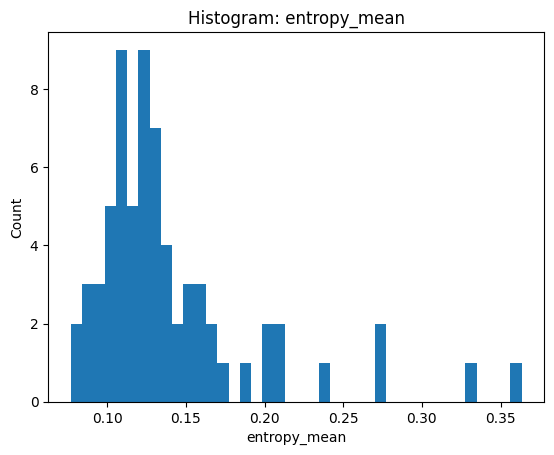

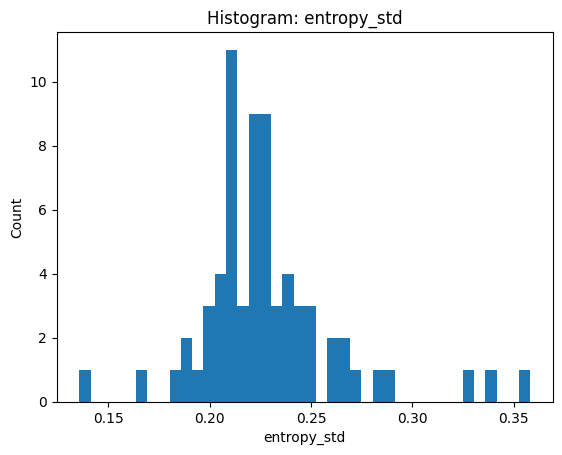

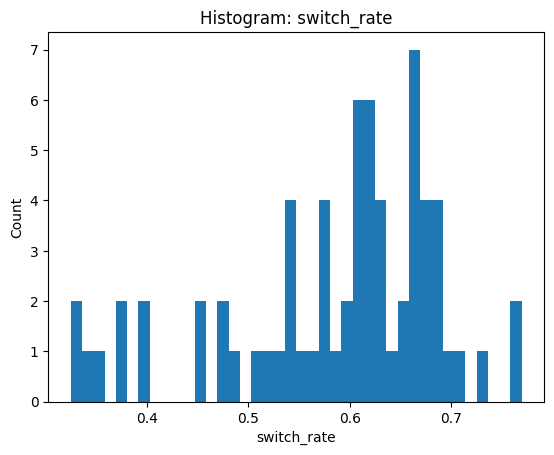

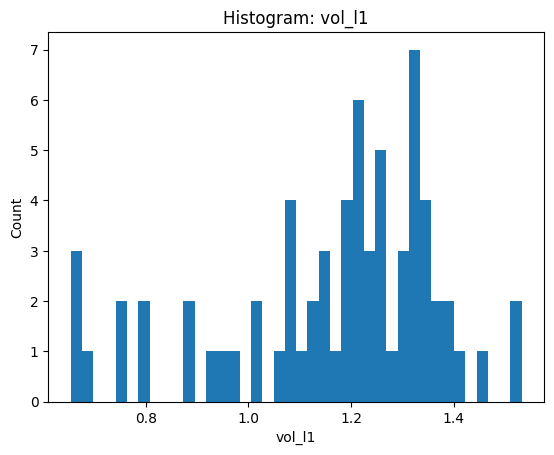

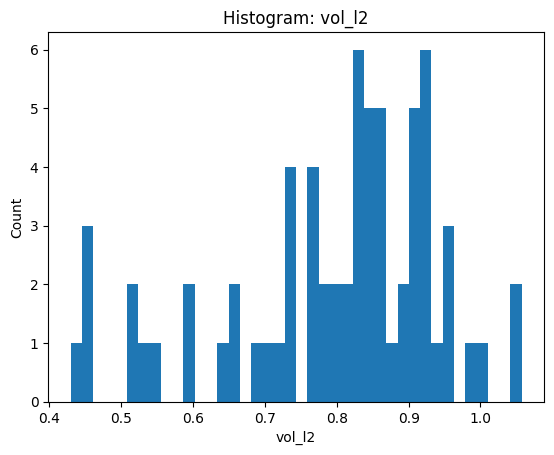

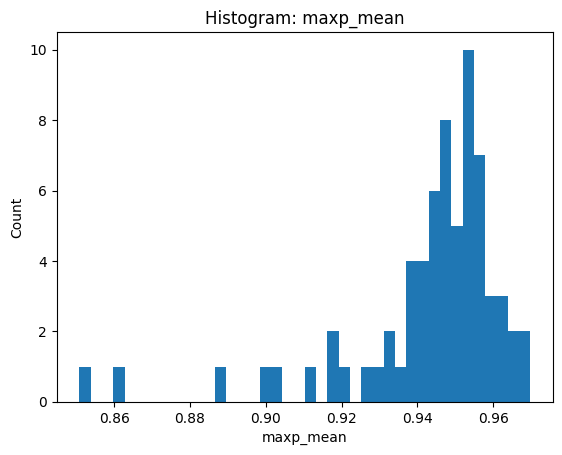

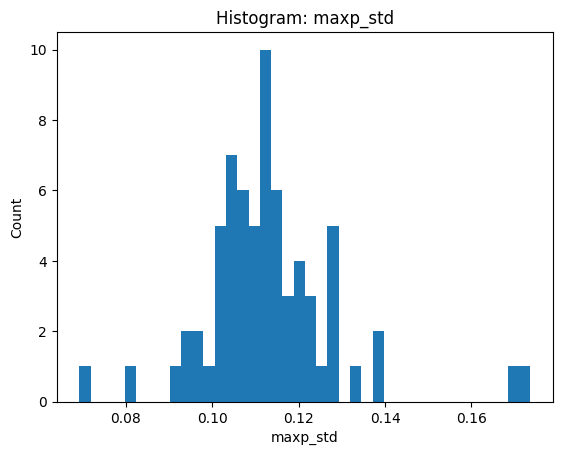

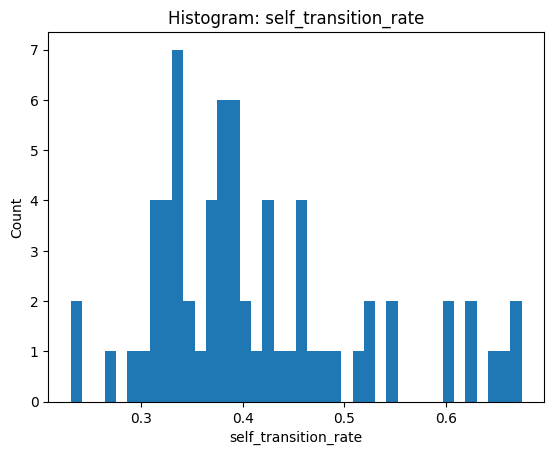

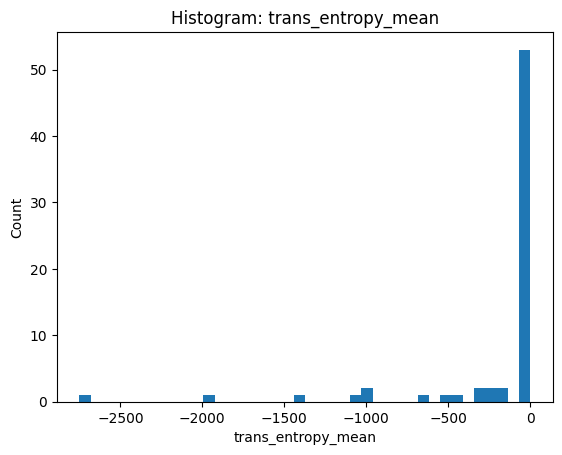

In [10]:
for c in core_feats:
    x = df[c].dropna().to_numpy()
    plt.figure()
    plt.hist(x, bins=40)
    plt.title(f"Histogram: {c}")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.show()


## 5. Scatter plots: features vs targets

These plots help interpret which vMF dynamics relate to outcomes.


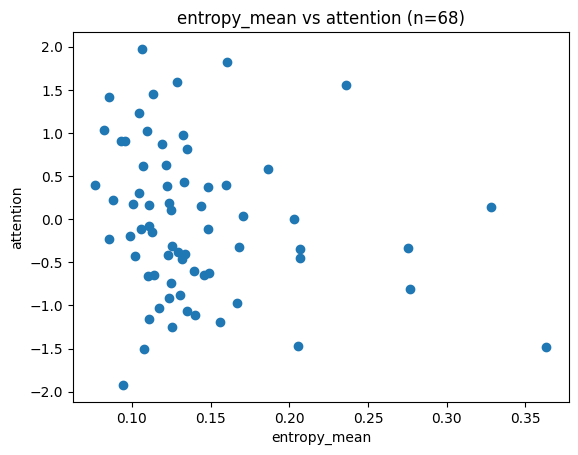

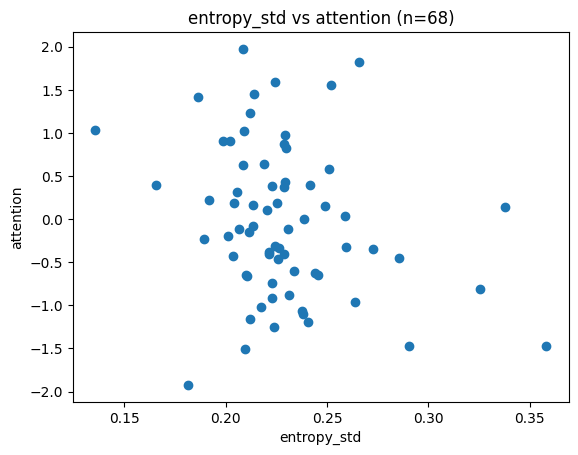

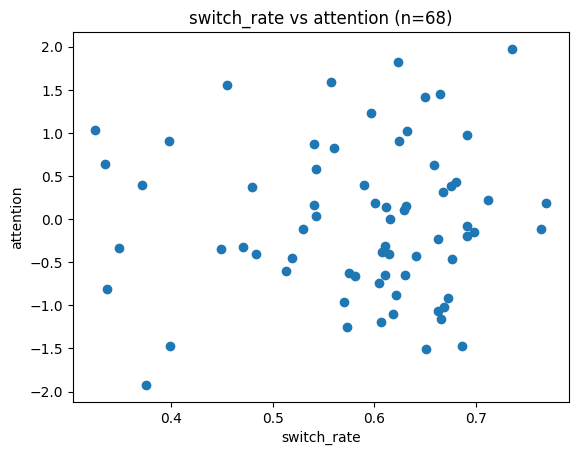

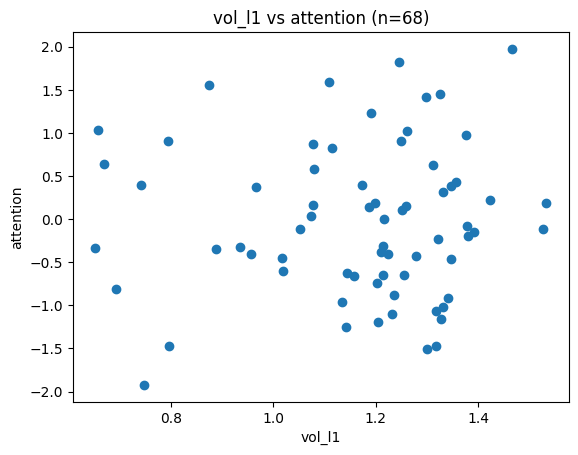

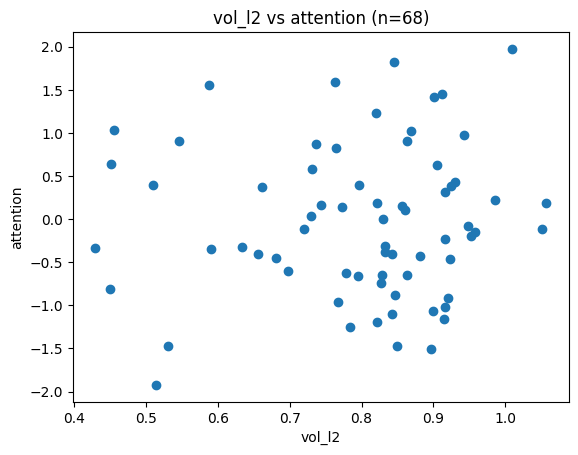

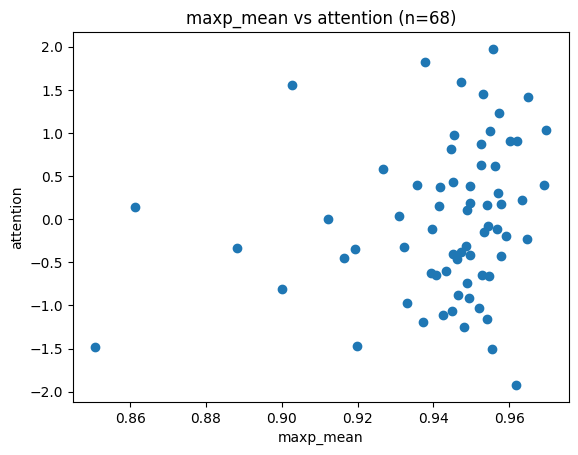

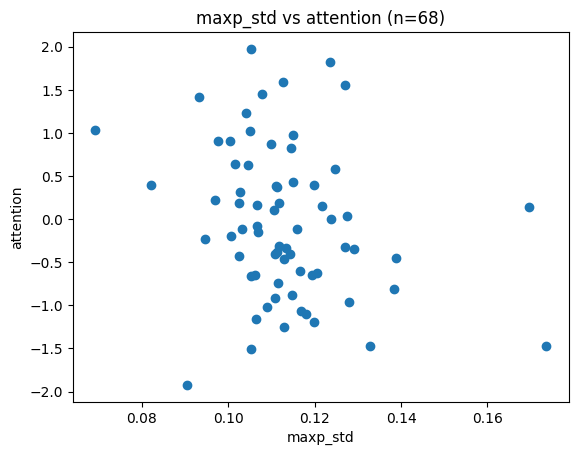

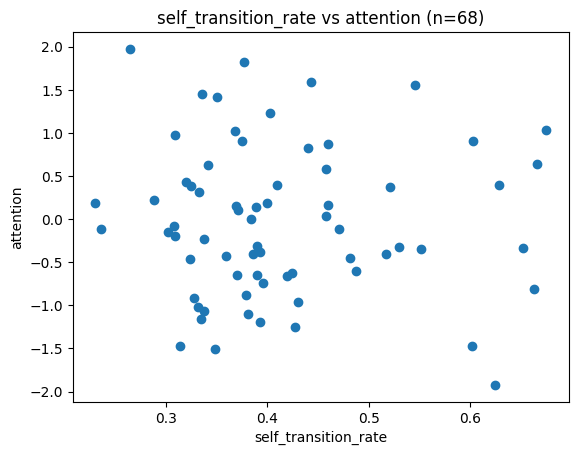

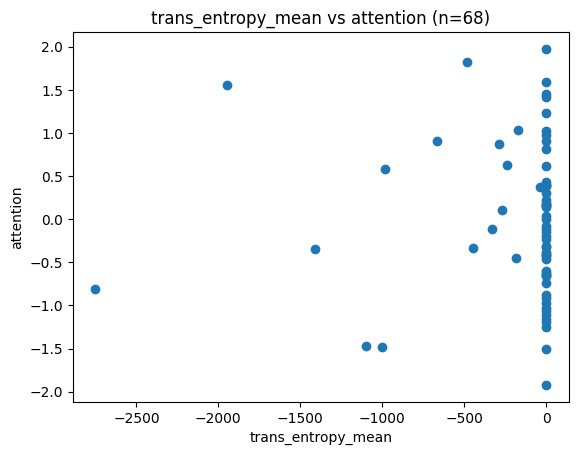

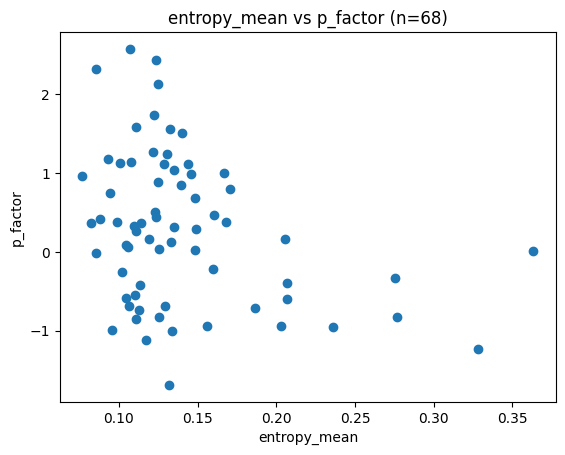

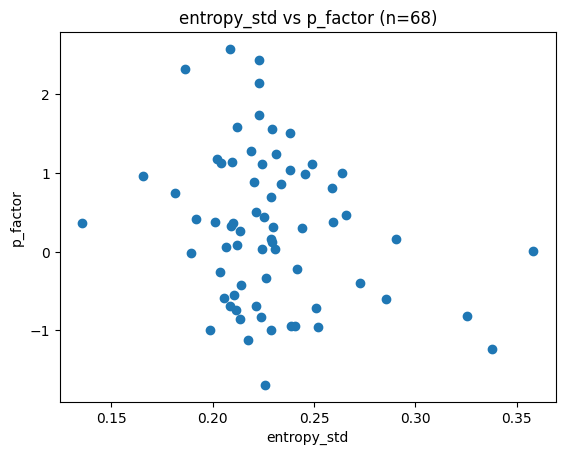

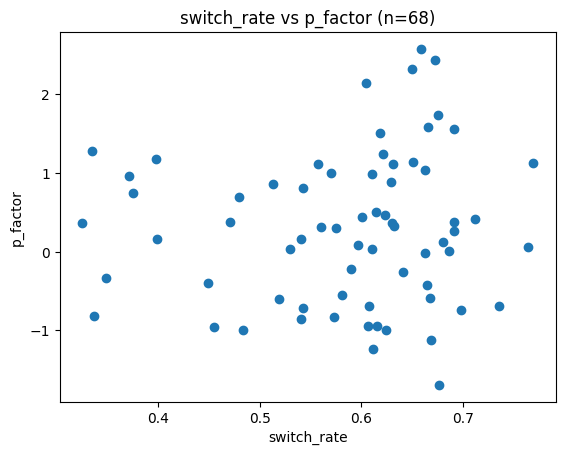

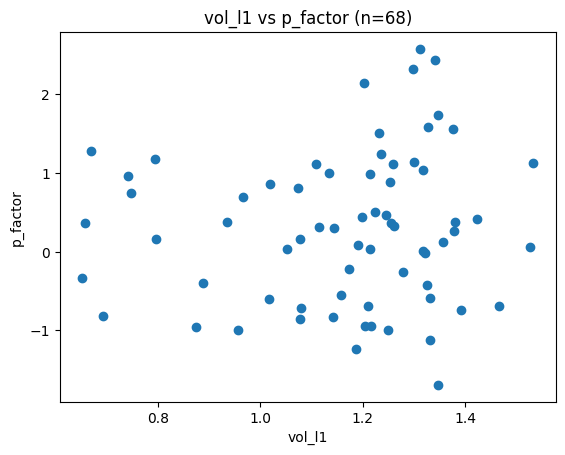

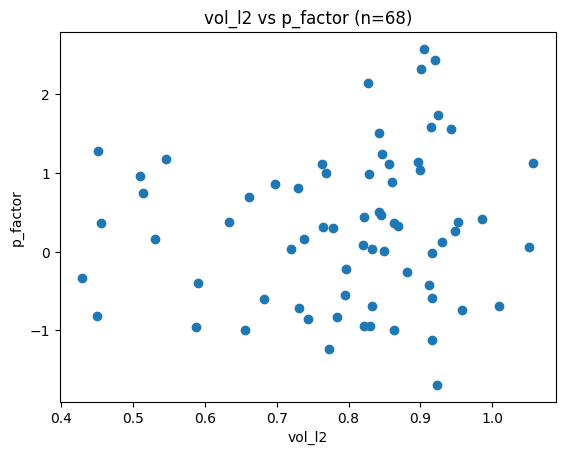

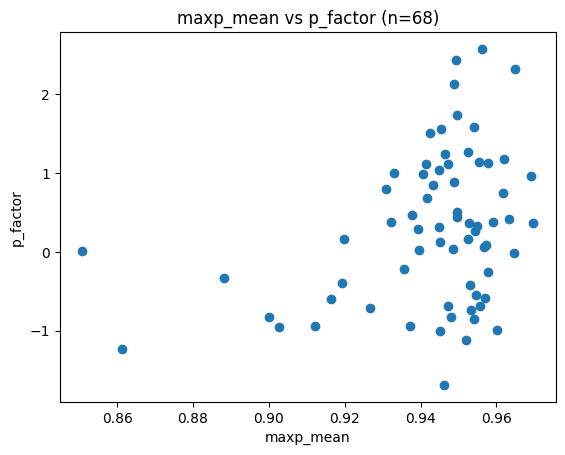

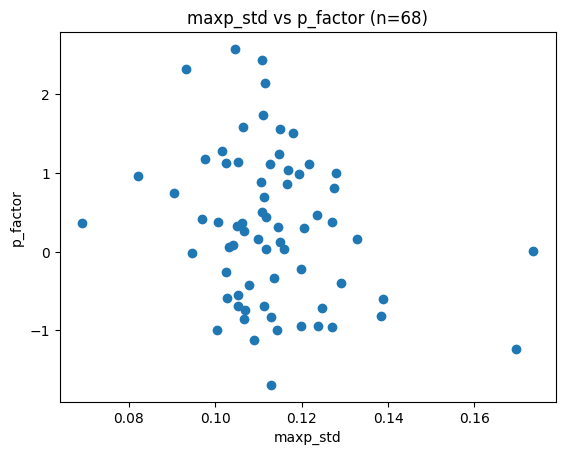

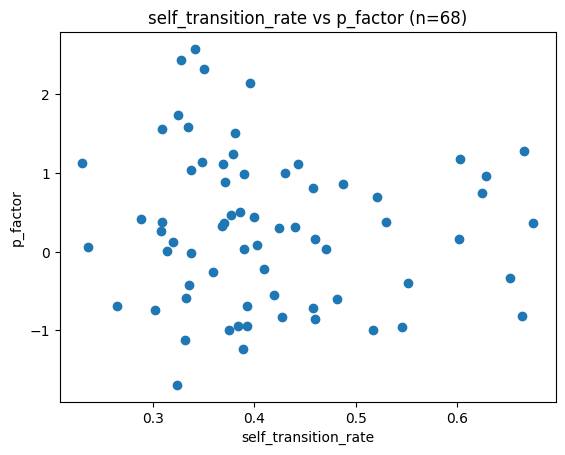

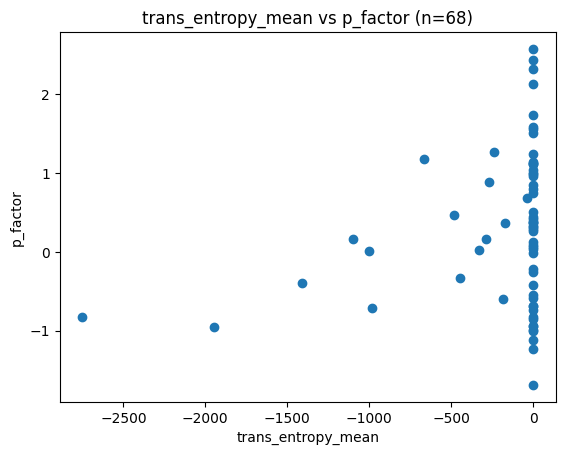

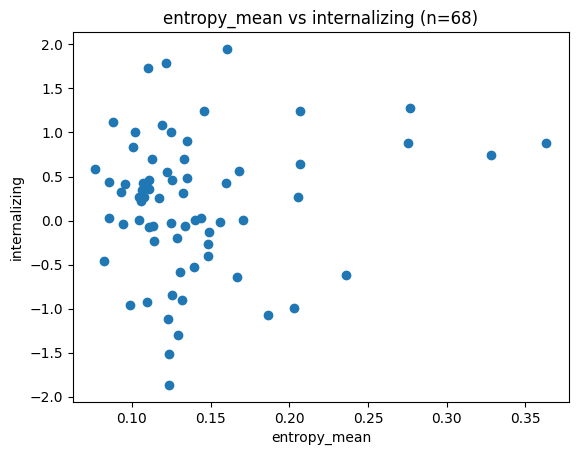

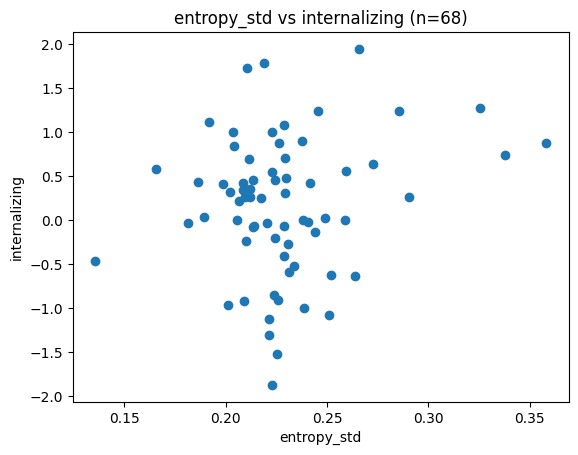

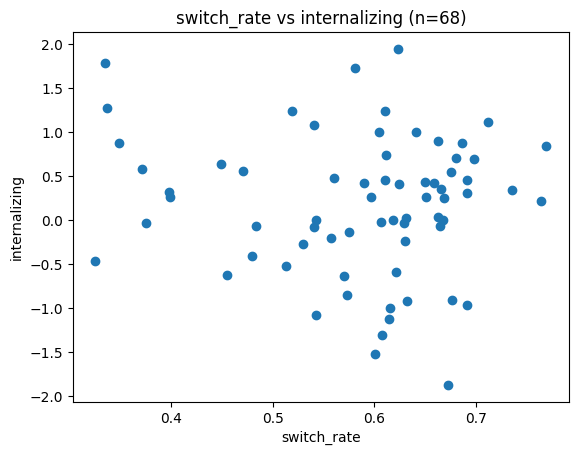

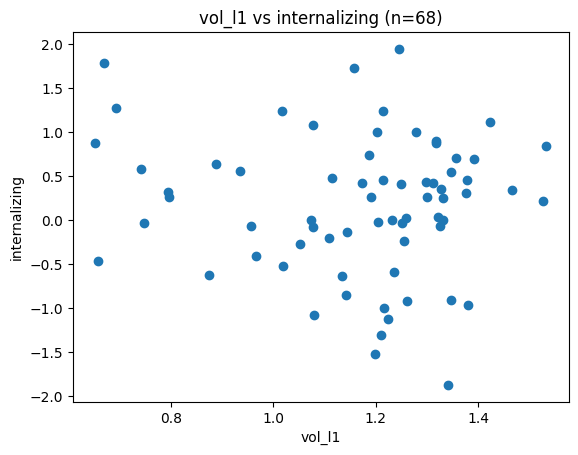

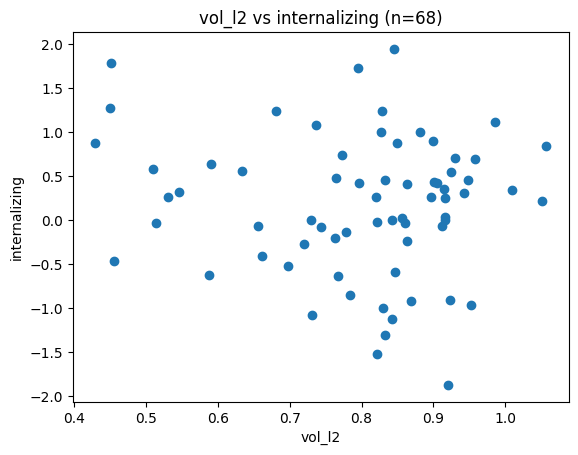

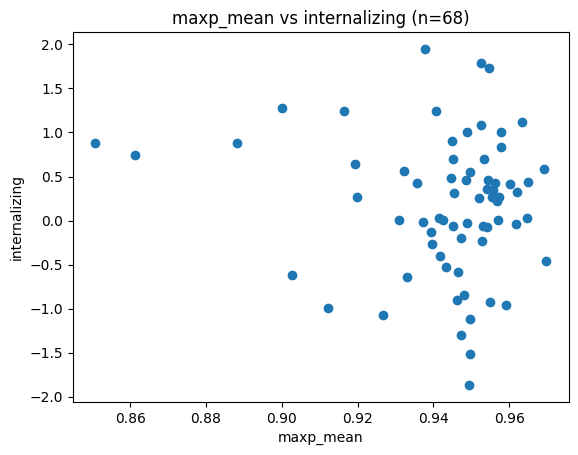

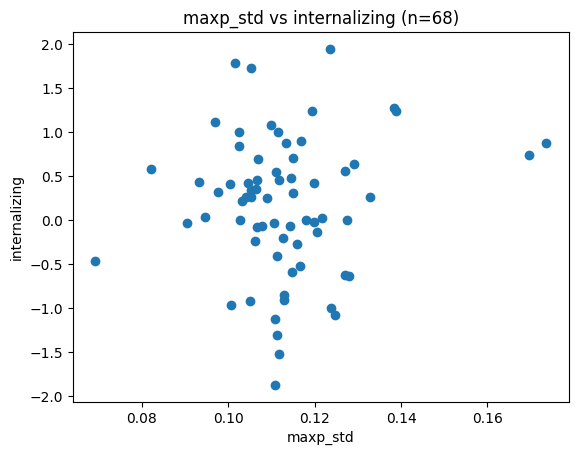

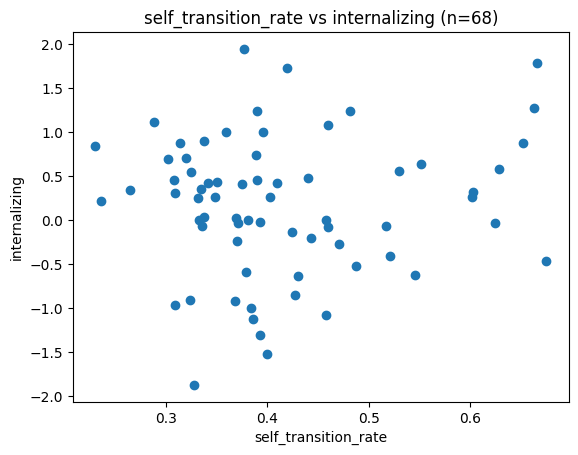

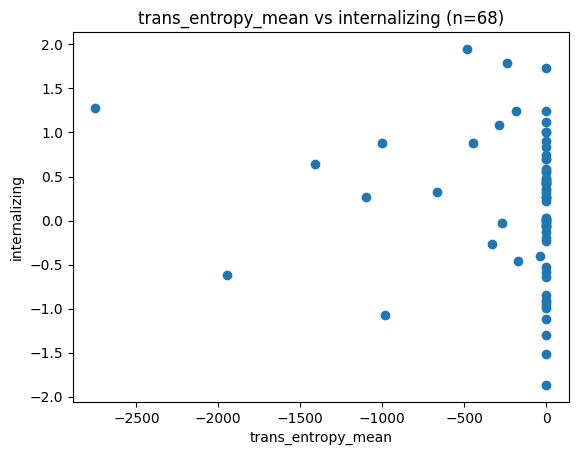

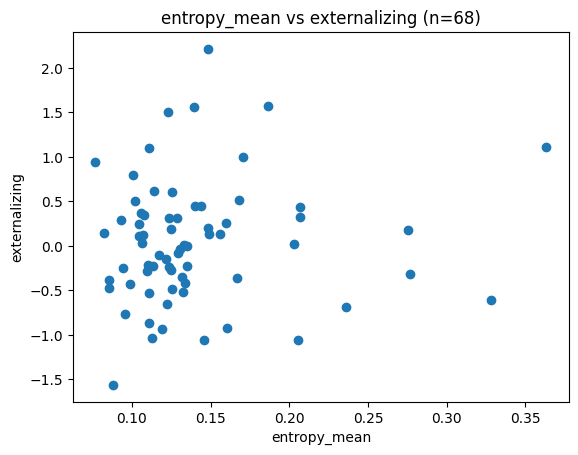

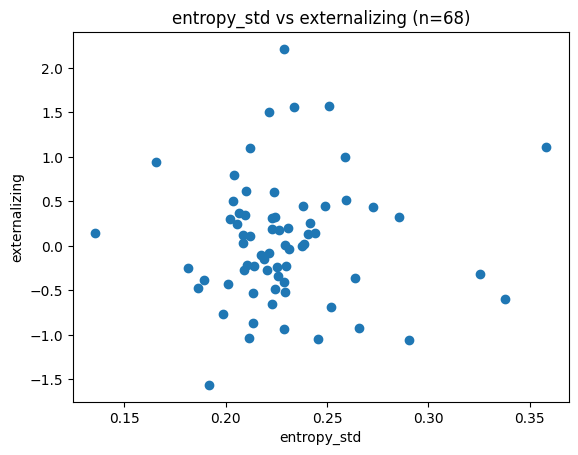

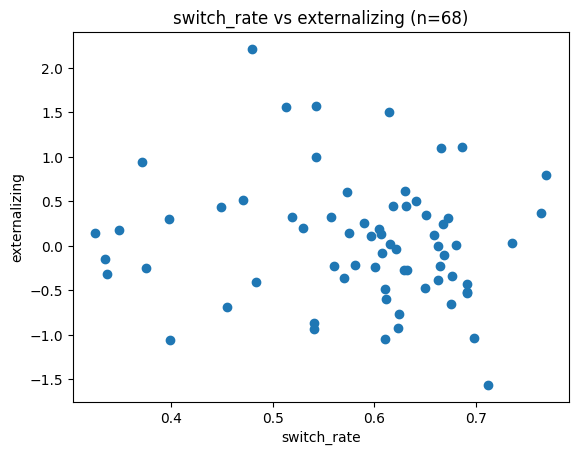

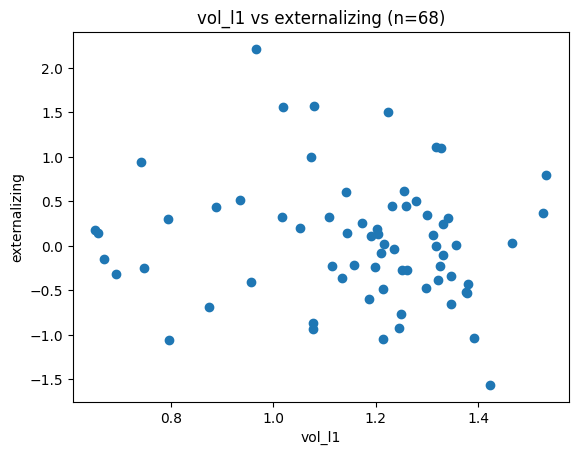

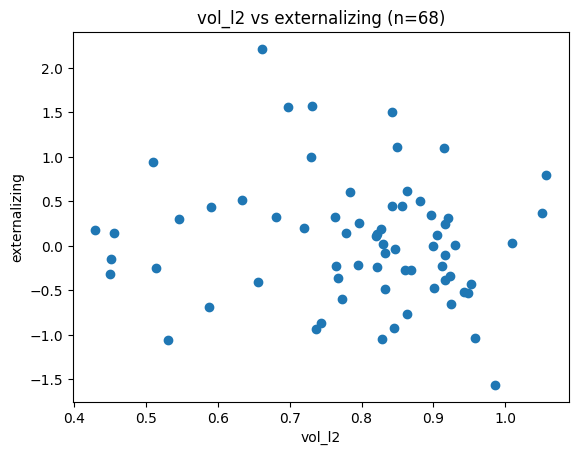

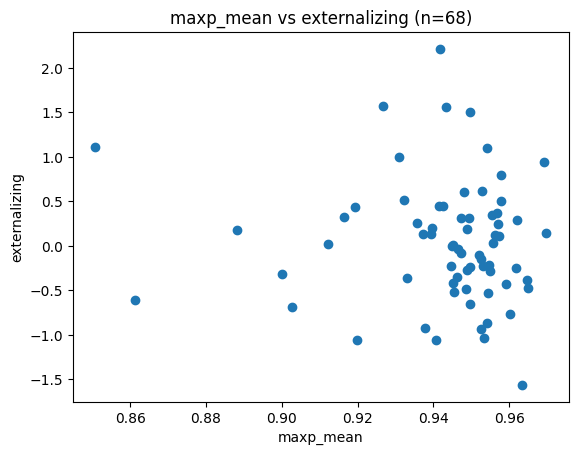

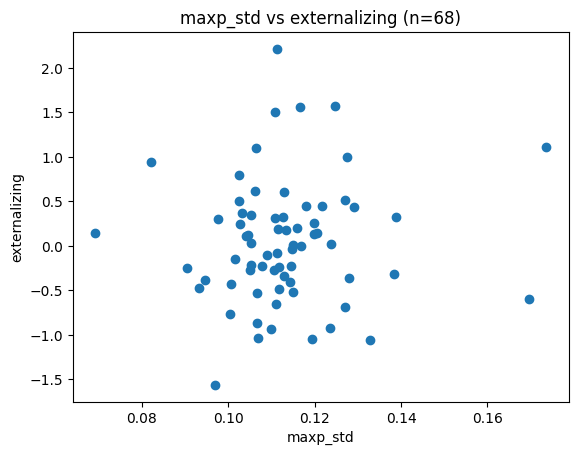

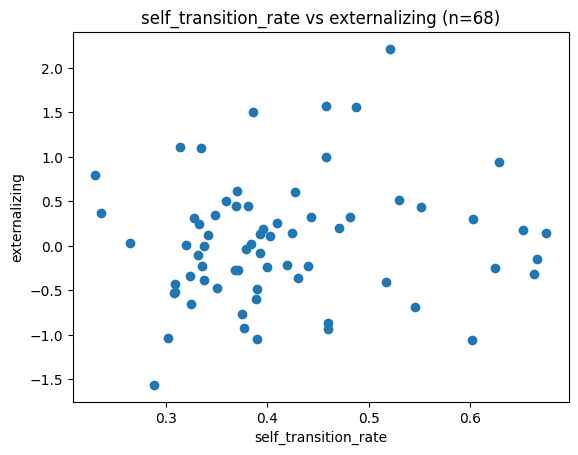

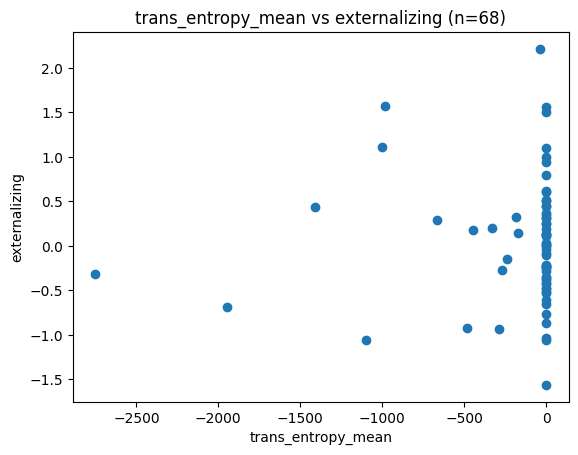

In [11]:
def scatter_feature_vs_target(feature: str, target: str):
    sub = df[[feature, target]].dropna()
    if len(sub) < 5:
        print(f"[SKIP] Not enough data for {feature} vs {target}")
        return

    plt.figure()
    plt.scatter(sub[feature], sub[target])
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f"{feature} vs {target} (n={len(sub)})")
    plt.show()

# Try core features vs each target
for target in targets:
    for feature in core_feats:
        scatter_feature_vs_target(feature, target)


## 6. Correlations (numeric features)

This section computes correlations between:
- dynamic features
- and each target

We report the **top absolute correlations** for interpretability.


In [12]:
numeric_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
corr = df[numeric_cols].corr(numeric_only=True)
corr.shape


(21, 21)

In [13]:
def top_corr_with_target(target: str, k: int = 20):
    if target not in corr.columns:
        print(f"[SKIP] {target} not found in numeric columns.")
        return
    s = corr[target].drop(labels=[target]).dropna().abs().sort_values(ascending=False)
    top = s.head(k)
    out = pd.DataFrame({
        "feature": top.index,
        "abs_corr": top.values,
        "corr": [corr.loc[f, target] for f in top.index],
    })
    return out

for target in targets:
    print(f"\nTop correlations with {target}:")
    display(top_corr_with_target(target, k=15))



Top correlations with attention:


,feature,abs_corr,corr
0,T_used,0.306626,0.306626
1,entropy_std,0.249915,-0.249915
2,maxp_std,0.245765,-0.245765
3,entropy_mean,0.200265,-0.200265
4,maxp_mean,0.196526,0.196526
5,externalizing,0.172066,-0.172066
6,occ_2,0.133374,0.133374
7,occ_3,0.113648,-0.113648
8,occ_5,0.112489,-0.112489
9,occ_4,0.082989,0.082989



Top correlations with p_factor:


,feature,abs_corr,corr
0,maxp_mean,0.320876,0.320876
1,entropy_mean,0.318334,-0.318334
2,maxp_std,0.254046,-0.254046
3,trans_entropy_mean,0.235833,0.235833
4,entropy_std,0.229611,-0.229611
5,occ_6,0.208772,-0.208772
6,occ_4,0.163831,-0.163831
7,occ_5,0.163294,-0.163294
8,externalizing,0.161327,0.161327
9,occ_0,0.146352,0.146352



Top correlations with internalizing:


,feature,abs_corr,corr
0,occ_2,0.284864,-0.284864
1,externalizing,0.269632,-0.269632
2,occ_1,0.205927,-0.205927
3,occ_5,0.205772,0.205772
4,entropy_std,0.179690,0.179690
5,occ_0,0.144266,0.144266
6,trans_entropy_mean,0.141238,-0.141238
7,occ_3,0.139963,0.139963
8,entropy_mean,0.134357,0.134357
9,maxp_mean,0.116316,-0.116316



Top correlations with externalizing:


,feature,abs_corr,corr
0,internalizing,0.269632,-0.269632
1,occ_6,0.185592,-0.185592
2,attention,0.172066,-0.172066
3,p_factor,0.161327,0.161327
4,vol_l2,0.113454,-0.113454
5,vol_l1,0.109144,-0.109144
6,switch_rate,0.106397,-0.106397
7,self_transition_rate,0.106397,0.106397
8,occ_1,0.103090,0.103090
9,occ_2,0.085898,0.085898


## 7. Simple baselines (optional)

`run_vmf_pipeline.py` already prints cross-validated performance.

This section provides a quick *in-notebook* baseline fit (train/test split) for sanity.
It is **not** a substitute for the script’s grouped cross-validation.


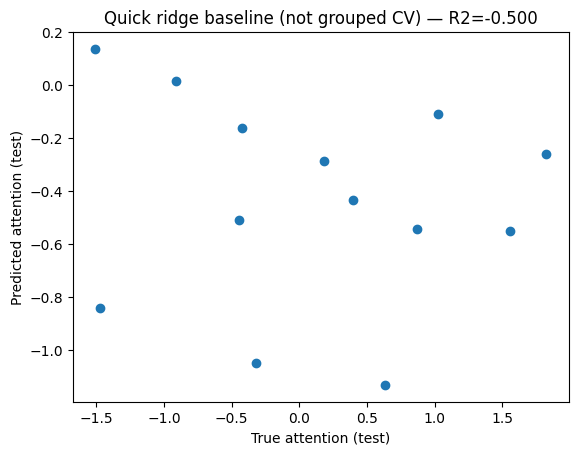

[Baseline] target=attention, n_test=13, R2=-0.500


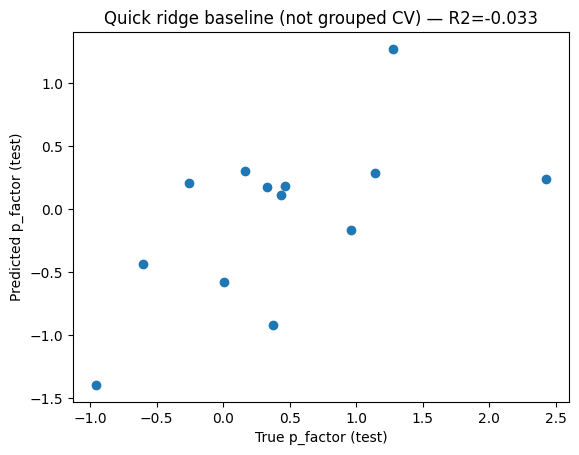

[Baseline] target=p_factor, n_test=13, R2=-0.033


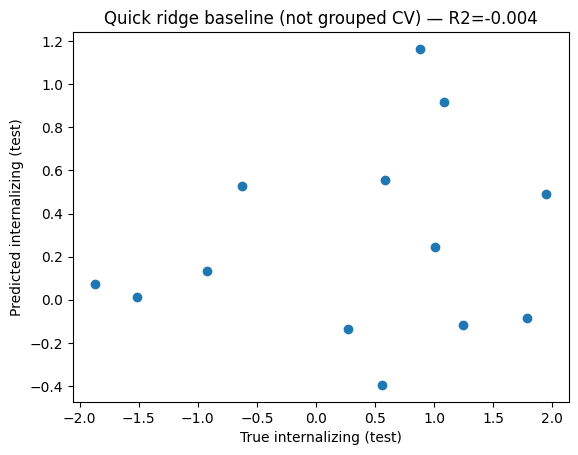

[Baseline] target=internalizing, n_test=13, R2=-0.004


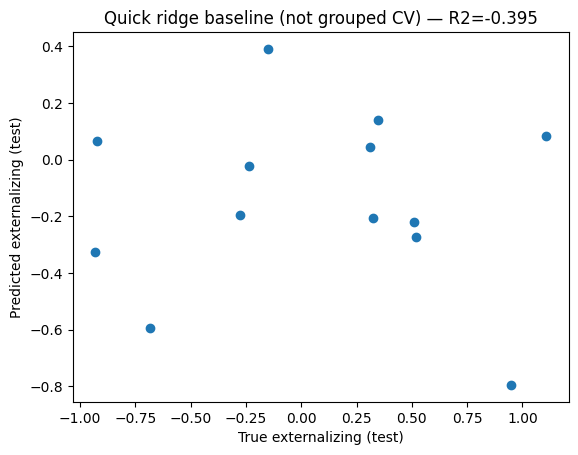

[Baseline] target=externalizing, n_test=13, R2=-0.395


In [14]:
from numpy.random import default_rng

def train_test_baseline(target: str, test_frac: float = 0.2, seed: int = 123):
    if target not in df.columns:
        print(f"[SKIP] target {target} not in df.")
        return

    sub = df.dropna(subset=[target]).copy()
    # Select numeric features only
    exclude = {"subject", target} | set([t for t in ["attention", "p_factor", "internalizing", "externalizing"] if t in sub.columns])
    feat_cols = [c for c in sub.columns if c not in exclude and pd.api.types.is_numeric_dtype(sub[c])]

    X = sub[feat_cols].to_numpy(dtype=float)
    y = sub[target].to_numpy(dtype=float)

    # Standardize features
    mu = X.mean(axis=0)
    sd = X.std(axis=0)
    sd = np.where(sd < 1e-12, 1.0, sd)
    Xz = (X - mu) / sd

    rng = default_rng(seed)
    idx = np.arange(len(y))
    rng.shuffle(idx)
    n_test = max(1, int(test_frac * len(y)))
    te = idx[:n_test]
    tr = idx[n_test:]

    # Ridge with intercept, no sklearn
    alpha = 10.0
    Xtr = np.column_stack([np.ones(len(tr)), Xz[tr]])
    Xte = np.column_stack([np.ones(len(te)), Xz[te]])
    p = Xtr.shape[1]
    I = np.eye(p); I[0,0] = 0.0
    coef = np.linalg.solve(Xtr.T @ Xtr + alpha*I, Xtr.T @ y[tr])
    yhat = Xte @ coef

    ss_res = float(np.sum((y[te] - yhat)**2))
    ss_tot = float(np.sum((y[te] - np.mean(y[te]))**2))
    r2 = 1.0 - ss_res/ss_tot if ss_tot > 1e-12 else 0.0

    plt.figure()
    plt.scatter(y[te], yhat)
    plt.xlabel(f"True {target} (test)")
    plt.ylabel(f"Predicted {target} (test)")
    plt.title(f"Quick ridge baseline (not grouped CV) — R2={r2:.3f}")
    plt.show()

    print(f"[Baseline] target={target}, n_test={len(te)}, R2={r2:.3f}")

for target in targets:
    train_test_baseline(target)


In [15]:
pred = pd.read_csv("../outputs/stageA_oof_predictions.csv")
pred.head()


,subject,target,y_true,y_pred_oof
0,NDARAA306NT2,attention,-0.647,-0.604361
1,NDARAA504CRN,attention,-0.342,-0.235626
2,NDARAA947ZG5,attention,0.978,0.754476
3,NDARAA948VFH,attention,-0.235,0.232344
4,NDARAB055BPR,attention,1.029,1.226917


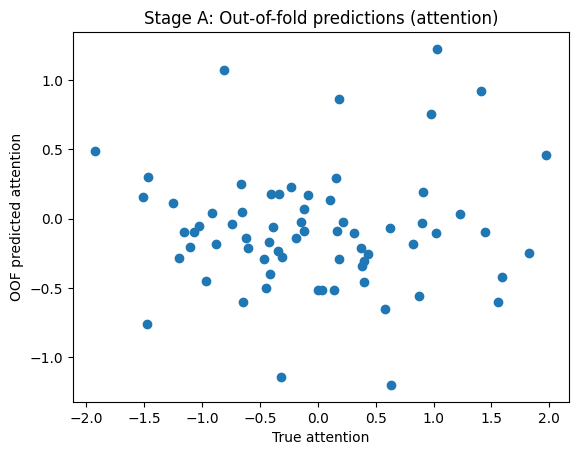

In [16]:
import matplotlib.pyplot as plt

sub = pred[pred["target"]=="attention"].dropna()
plt.figure()
plt.scatter(sub["y_true"], sub["y_pred_oof"])
plt.xlabel("True attention")
plt.ylabel("OOF predicted attention")
plt.title("Stage A: Out-of-fold predictions (attention)")
plt.show()


## 8. Notes for students

- If you want to change **how features are computed**, edit `vmf_features.py`, then re-run:
  ```bash
  python run_vmf_pipeline.py
  ```
- If you want to change **which files are loaded**, edit `config.py` or `vmf_dataset.py`.
- The notebook should remain focused on **plots and interpretation**, not the pipeline.
